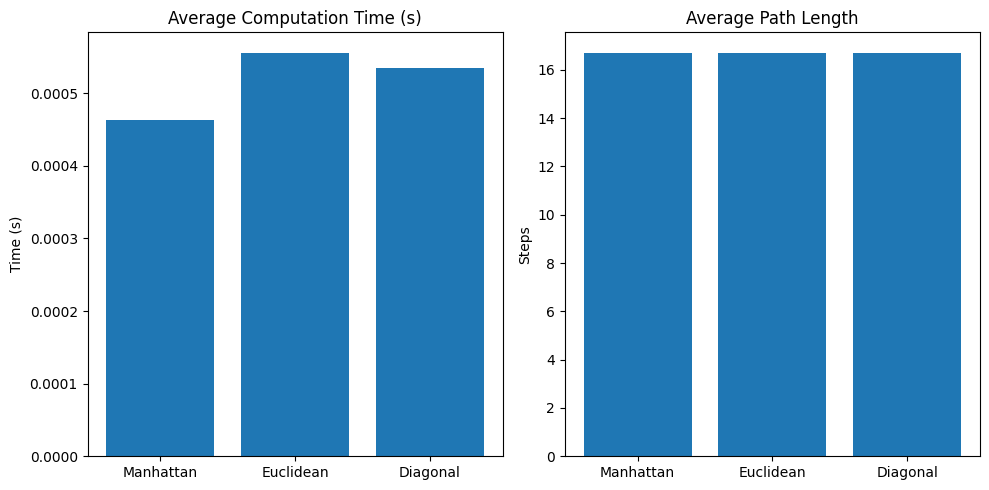

In [22]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import time
import random
import math

# A* Node Definition
class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

    def __lt__(self, other):
        return self.f < other.f

    def __eq__(self, other):
        return self.position == other.position

    def __hash__(self):
        return hash(self.position)


# Heuristic Functions
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def euclidean(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def diagonal(a, b):
    return max(abs(a[0] - b[0]), abs(a[1] - b[1]))


# A* Algorithm
def astar(grid, start, goal, heuristic):
    open_list = []
    closed_set = set()
    start_node = Node(start)
    goal_node = Node(goal)
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)
        if current_node.position == goal_node.position:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.position)
        x, y = current_node.position

        for dx, dy in [(0,1), (1,0), (0,-1), (-1,0)]:
            neighbor = (x + dx, y + dy)
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                if grid[neighbor] == 1 or neighbor in closed_set:
                    continue
                neighbor_node = Node(neighbor, current_node)
                neighbor_node.g = current_node.g + 1
                neighbor_node.h = heuristic(neighbor, goal_node.position)
                neighbor_node.f = neighbor_node.g + neighbor_node.h

                if not any(open_node.position == neighbor for open_node in open_list):
                    heapq.heappush(open_list, neighbor_node)
    return None


# Generate Random Grid
def generate_grid(size=20, obstacle_prob=0.3):
    grid = np.zeros((size, size), dtype=int)
    for i in range(size):
        for j in range(size):
            if random.random() < obstacle_prob:
                grid[i, j] = 1
    start = (random.randint(0, size-1), random.randint(0, size-1))
    goal = (random.randint(0, size-1), random.randint(0, size-1))
    grid[start] = 0
    grid[goal] = 0
    return grid, start, goal


# Run Multiple Tests & Compare
def evaluate_heuristics(num_tests=10, grid_size=20):
    heuristics = {
        "Manhattan": manhattan,
        "Euclidean": euclidean,
        "Diagonal": diagonal
    }

    times = {h: [] for h in heuristics}
    path_lengths = {h: [] for h in heuristics}

    for i in range(num_tests):
        grid, start, goal = generate_grid(grid_size)
        for name, h in heuristics.items():
            start_time = time.time()
            path = astar(grid, start, goal, h)
            elapsed = time.time() - start_time
            times[name].append(elapsed)
            path_lengths[name].append(len(path) if path else np.nan)

    # Plot results
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.bar(times.keys(), [np.nanmean(times[h]) for h in heuristics])
    plt.title("Average Computation Time (s)")
    plt.ylabel("Time (s)")

    plt.subplot(1,2,2)
    plt.bar(path_lengths.keys(), [np.nanmean(path_lengths[h]) for h in heuristics])
    plt.title("Average Path Length")
    plt.ylabel("Steps")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    evaluate_heuristics(num_tests=10, grid_size=20)
